In [1]:
#Importing libraries.
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.gridspec as gridspec
from scipy import fftpack

In [2]:
#Find the all .jpg files in the folder and declare the path.
#Read the every images and add to the list.
#Sort them according to number of pictures.
imageformat=".jpg"
path="/Users/egeoguzman/Desktop/dip_hw3/input"
files=[os.path.join(path,f) for f in os.listdir(path) if f.endswith(imageformat)]
files.sort()
files

['/Users/egeoguzman/Desktop/dip_hw3/input/noisy1.jpg',
 '/Users/egeoguzman/Desktop/dip_hw3/input/noisy2.jpg',
 '/Users/egeoguzman/Desktop/dip_hw3/input/noisy3.jpg']

In [10]:
img = cv.imread("/Users/egeoguzman/Desktop/dip_hw3/input/noisy2.jpg",0)
im_fft = fftpack.fft2(img)
def plot_spectrum(im_fft):
    plt.figure(figsize=(10,10))
    plt.imshow(np.abs(im_fft), norm=LogNorm(vmin=5),cmap=plt.cm.gray), plt.colorbar()

Text(0.5, 1.0, 'Spectrum with FT')

<Figure size 432x288 with 0 Axes>

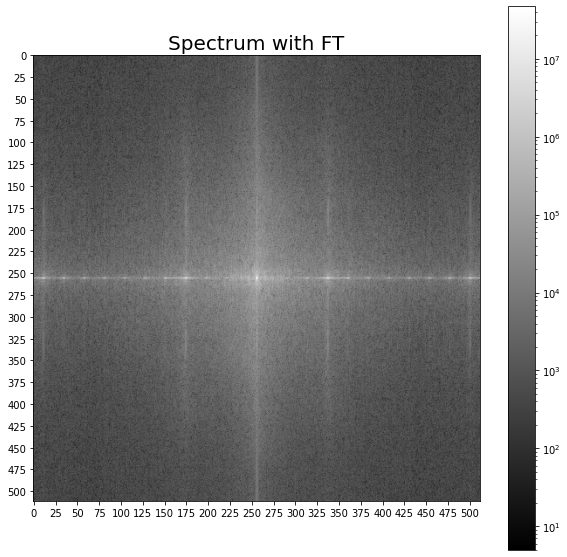

In [11]:
plt.figure(), plot_spectrum(fftpack.fftshift(im_fft))
plt.xticks(np.arange(0, im_fft.shape[1], 25))
plt.yticks(np.arange(0, im_fft.shape[0], 25))
plt.title("Spectrum with FT",size=20)

(<Figure size 432x288 with 0 Axes>, None, Text(0.5, 1.0, 'Filtered Spectrum'))

<Figure size 432x288 with 0 Axes>

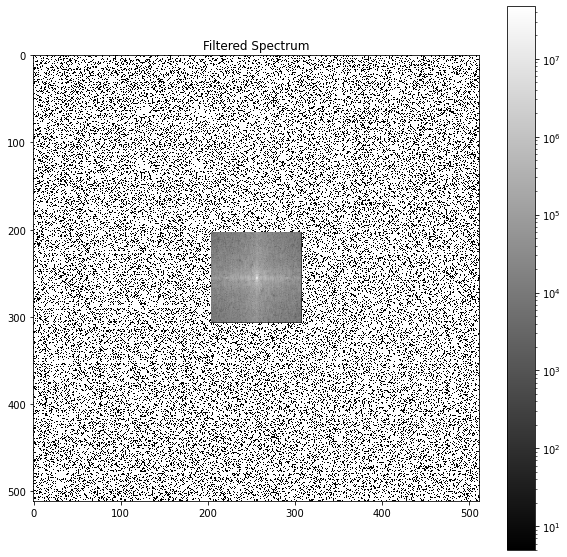

In [12]:
keep_fraction = 0.1
im_fft2 = im_fft.copy()
row , column = im_fft2.shape
im_fft2[int(row * keep_fraction):int(row * (1-keep_fraction))] = 0
im_fft2[:, int(column * keep_fraction):int(column * (1-keep_fraction))] = 0

plt.figure(),plot_spectrum(fftpack.fftshift(im_fft2)),plt.title("Filtered Spectrum")


Text(0.5, 1.0, 'Output-Image2')

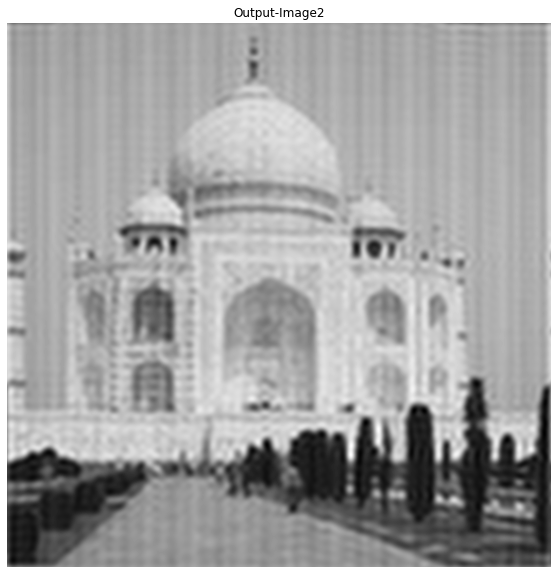

In [14]:
im_new = fftpack.ifft2(im_fft2).real
plt.figure(figsize=(10,10)) , plt.imshow(im_new,plt.cm.gray),plt.axis("off")
plt.title("Output-Image2")

/Users/egeoguzman/Desktop/dip_hw3/virtualenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  


([<matplotlib.axis.YTick at 0x1210adb10>,
 <a list of 11 Text major ticklabel objects>)

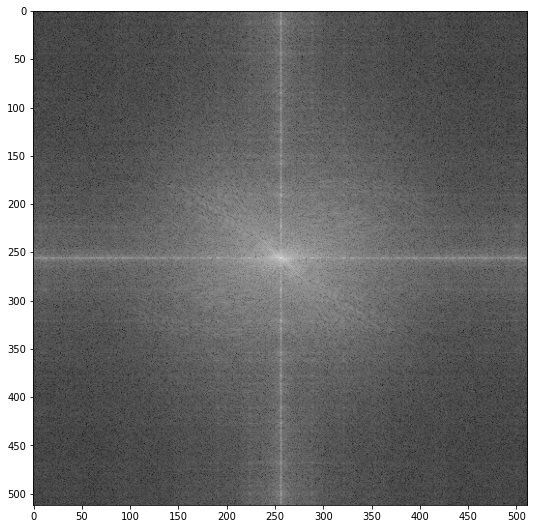

In [16]:
keep_fraction = 0.1
img = cv.imread("/Users/egeoguzman/Desktop/dip_hw3/input/noisy3.jpg",0)
F1 = fftpack.fft2((img).astype(float))
F2 = fftpack.fftshift(F1)
plt.figure(figsize=(20,20))
plt.subplot(2,2,4), plt.imshow( (20*np.log10( 0.1 + F2)).astype(int), cmap=plt.cm.gray)

plt.xticks(np.arange(0, F2.shape[1], 50))
plt.yticks(np.arange(0, F2.shape[0], 50))

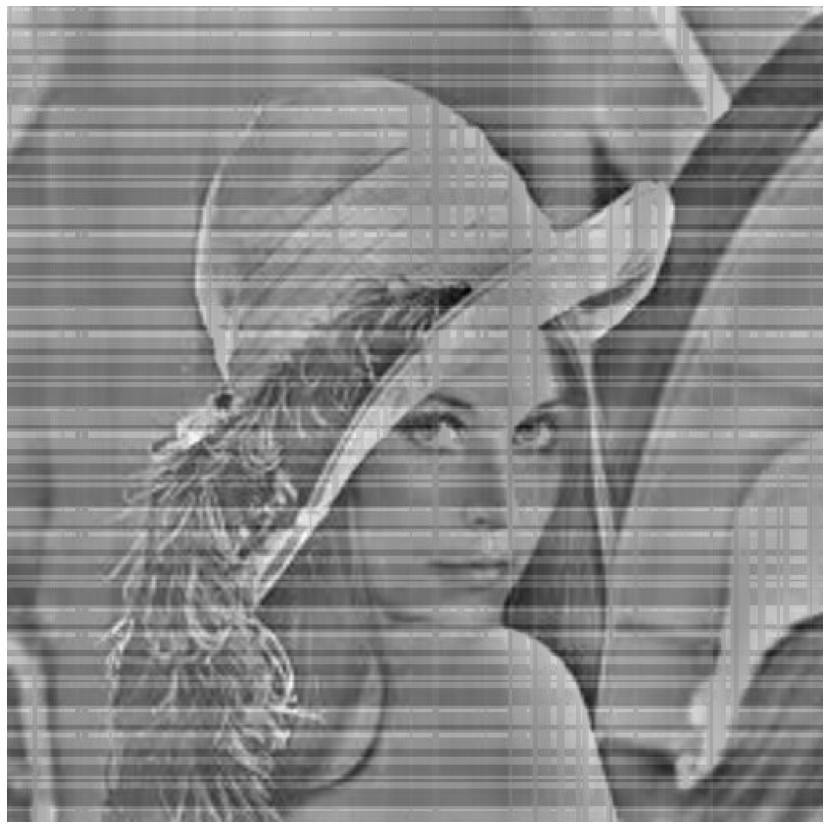

True

In [19]:
F2[256:260,230:] = F2[256:260,:270] = 0
im1 = fftpack.ifft2(fftpack.ifftshift( F2 )).real
plt.figure(figsize=(15,15))
plt.axis('off'), plt.imshow(im1, cmap='gray'), plt.show()
cv.imwrite("/Users/egeoguzman/Desktop/dip_hw3/ege.jpg",im1)